In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc 


In [3]:
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [4]:
sns.set(style="whitegrid")

In [5]:
data = pd.concat([train_data, test_data], ignore_index=True)


In [6]:
print(data.head())
print(data.info())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [7]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [8]:
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour
data['transaction_weekday'] = data['trans_date_trans_time'].dt.weekday

In [9]:
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year


In [10]:
drop_columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 
                'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time']
data = data.drop(columns=drop_columns)

In [11]:
le = LabelEncoder()
data['merchant'] = le.fit_transform(data['merchant'])
data['category'] = le.fit_transform(data['category'])
data['gender'] = le.fit_transform(data['gender'])

In [12]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


In [13]:
# Logistic Regression
print("Logistic Regression Results:")
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test)

Logistic Regression Results:
Confusion Matrix:
[[368385    164]
 [  1930      0]]
Accuracy: 0.9943478577733151
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368549
           1       0.00      0.00      0.00      1930

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



In [14]:
# Decision Tree Classifier
print("Decision Tree Results:")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test)

Decision Tree Results:
Confusion Matrix:
[[368173    376]
 [   325   1605]]
Accuracy: 0.9981078549661384
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.81      0.83      0.82      1930

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479



In [15]:
# Random Forest Classifier
print("Random Forest Results:")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

Random Forest Results:
Confusion Matrix:
[[368510     39]
 [   454   1476]]
Accuracy: 0.9986692902971559
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.97      0.76      0.86      1930

    accuracy                           1.00    370479
   macro avg       0.99      0.88      0.93    370479
weighted avg       1.00      1.00      1.00    370479



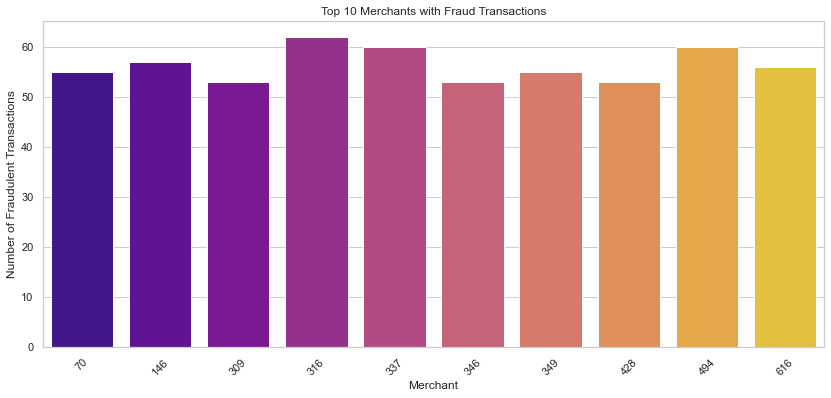

In [16]:
plt.figure(figsize=(14, 6))
top_fraud_merchants = data[data['is_fraud'] == 1]['merchant'].value_counts().nlargest(10)
sns.barplot(x=top_fraud_merchants.index, y=top_fraud_merchants.values, palette='plasma')
plt.title('Top 10 Merchants with Fraud Transactions')
plt.xlabel('Merchant')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

Confusion Matrices:
Logistic Regression Confusion Matrix:


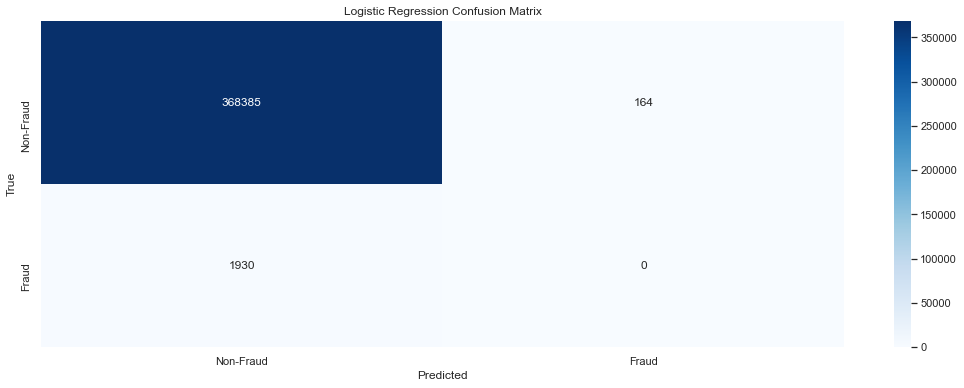

Decision Tree Confusion Matrix:


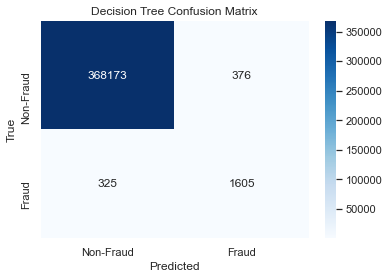

Random Forest Confusion Matrix:


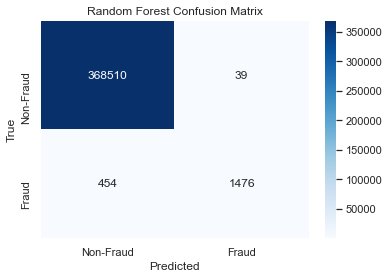

In [24]:
# Function to generate Confusion Matrix heatmap
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], 
                yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for each model
print("Confusion Matrices:")
plt.figure(figsize=(18, 6))

print("Logistic Regression Confusion Matrix:")
plot_confusion_matrix(lr, X_test, y_test, "Logistic Regression")

print("Decision Tree Confusion Matrix:")
plot_confusion_matrix(dt, X_test, y_test, "Decision Tree")

print("Random Forest Confusion Matrix:")
plot_confusion_matrix(rf, X_test, y_test, "Random Forest")



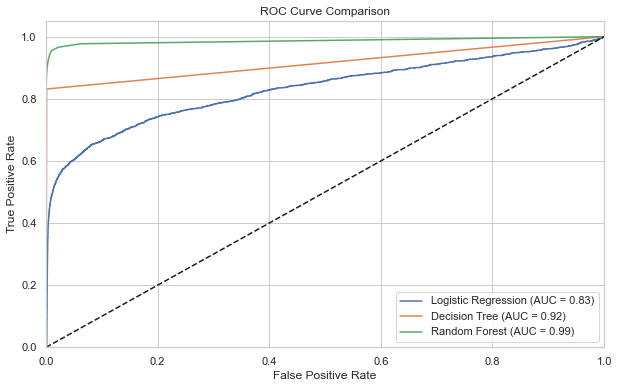

In [25]:
# ROC Curve function
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    
    for model, name in models:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc="lower right")
    plt.show()
# Plot ROC Curves for the models
models = [(lr, 'Logistic Regression'), (dt, 'Decision Tree'), (rf, 'Random Forest')]
plot_roc_curve(models, X_test, y_test)


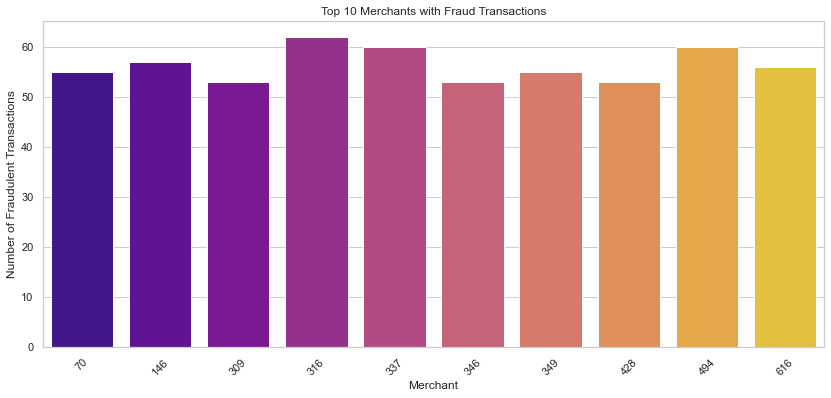

In [23]:


# Top 10 Merchants with Fraud Transactions (already included in your code)
plt.figure(figsize=(14, 6))
top_fraud_merchants = data[data['is_fraud'] == 1]['merchant'].value_counts().nlargest(10)
sns.barplot(x=top_fraud_merchants.index, y=top_fraud_merchants.values, palette='plasma')
plt.title('Top 10 Merchants with Fraud Transactions')
plt.xlabel('Merchant')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()